In [1]:
import os
import scanpy as sc
import pandas as pd
from scipy.io import mmread
from scipy.sparse import csr_matrix

HVF=True
TEST =False 

TEST_genes = 300
TEST_samples = 500

k = 15

 # Load Dataset

In [2]:
inputfile="../data/AllonKleinLab/Experiment1/stateFate_inVitro_normed_counts.mtx"
outputfolder = "../out/AllonKleinLab/Experiment1"

se = csr_matrix(mmread(inputfile))
se = se[se.getnnz(1)>0][:,se.getnnz(0)>0]

if TEST:
    tsamples = min(TEST_samples, se.shape[0])
    tgenes = min(TEST_genes, se.shape[1])
    se.resize((tsamples, tgenes))
    se = se[se.getnnz(1)>0][:,se.getnnz(0)>0]

adata = sc.AnnData(se)
#sc.pp.normalize_total(adata, target_sum=1e6)
##sc.pp.log1p(adata)
sc.pp.scale(adata, zero_center=False)
sc.pp.highly_variable_genes(adata)
print(adata)
if HVF:
    adata = adata[:, adata.var.highly_variable]
    adata = adata[adata.X.getnnz(1)>0][:,adata.X.getnnz(0)>0]
    print(adata)
    
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)


AnnData object with n_obs × n_vars = 488 × 90
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
View of AnnData object with n_obs × n_vars = 420 × 5
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'


/home/matteo/.conda/envs/pyaa/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


 # Visualize data

Saving Image --- ../out/AllonKleinLab/Experiment1/PCA.png


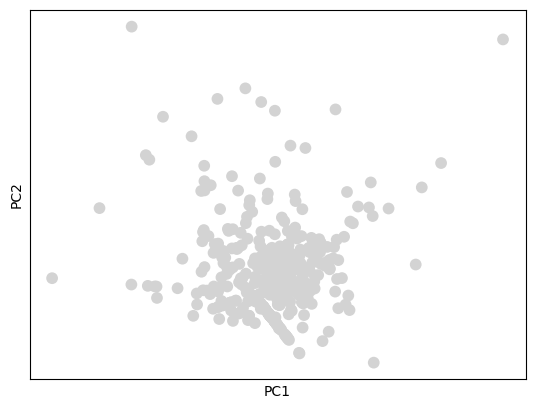

In [3]:
# PCA plot
imgname = os.path.join(outputfolder, "PCA.png")
print(f"Saving Image --- {imgname}")
sc.pl.pca(adata, save=imgname.split('/')[-1])

Saving Image --- ../out/AllonKleinLab/Experiment1/UMAP.png


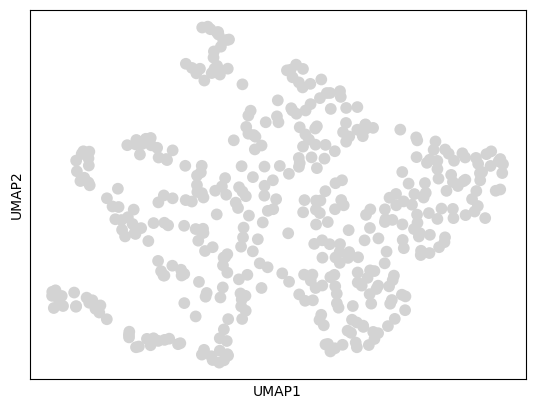

In [4]:
# UMAP plot
imgname = os.path.join(outputfolder, "UMAP.png")
print(f"Saving Image --- {imgname}")
sc.pl.umap(adata, save=imgname.split('/')[-1])

Saving Image --- ../out/AllonKleinLab/Experiment1/elbow.pdf


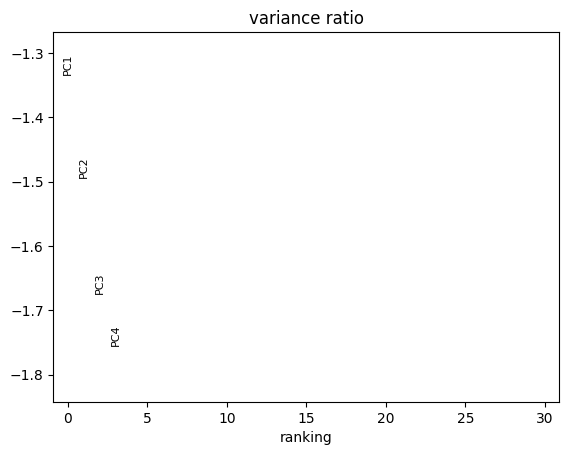

In [5]:
# Elbow plot
imgname = os.path.join(outputfolder, "elbow.pdf")
print(f"Saving Image --- {imgname}")
sc.pl.pca_variance_ratio(adata, log=True, save=imgname.split('/')[-1])

In [6]:
## Archetypes
#import archetypes as arch
#from time import time
#
#aa_kwargs = {
#    "n_archetypes": 14,
#    "n_init": 5,
#    "max_iter": 10000,
#    "verbose": True,
#    "tol": 1e-3,
#}
#
#mod0 = arch.AA(**aa_kwargs, algorithm_init="furthest_sum")
#
#print(type(adata.X))
#t0=time()
#mod0.fit_transform(adata.X.toarray())
#t1=time()
#
#print(f"mod0: {t1-t0:.2f} seconds|RSS: {mod0.rss:.2f}")

<class 'scipy.sparse._csr.csr_matrix'>
Initialization 1/5
    Iteration:     1, RSS: inf


RuntimeError: Maximum number of iterations reached.